In [262]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [263]:
df = pd.read_csv('data.csv')
df

,Client_ID,Loan_Default,Contract_Type,Gender,Owns_Car,Owns_Realty,Income,Credit_Amount,Loan_Annuity,Type_of_Suite,...,Years_Employed,Years_Registration,Years_Last_Phone_Change,Age_Binned,Years_Employed_Binned,Years_Registration_Binned,Observed_30d_Social_Circle_Binned,Observed_60d_Social_Circle_Binned,Defied_30d_Social_Circle_Binned,Defied_60d_Social_Circle_Binned
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,...,1,9.0,3.106849,18-30,0-5,6-12,0-5,0-5,0-5,0-5
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,...,3,3.0,2.268493,41-50,0-5,0-5,0-5,0-5,0-5,0-5
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,...,0,11.0,2.232877,51-60,0-5,6-12,0-5,0-5,0-5,0-5
3,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,...,8,11.0,3.030137,51-60,6-12,6-12,0-5,0-5,0-5,0-5
4,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,"Spouse, partner",...,4,13.0,6.947945,41-50,0-5,13-20,0-5,0-5,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270275,456247,0,Cash loans,F,N,Y,112500.0,345510.0,17770.5,Unaccompanied,...,1,1.0,6.342466,31-40,0-5,0-5,6-10,6-10,0-5,0-5
270276,456249,0,Cash loans,F,N,Y,112500.0,225000.0,22050.0,Unaccompanied,...,25,20.0,0.000000,61-70,+25,+25,0-5,0-5,0-5,0-5
270277,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Unaccompanied,...,21,18.0,5.230137,41-50,+25,13-20,6-10,6-10,0-5,0-5
270278,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Unaccompanied,...,13,7.0,0.882192,31-40,13-20,6-12,0-5,0-5,0-5,0-5


In [264]:
df.columns

Index(['Client_ID', 'Loan_Default', 'Contract_Type', 'Gender', 'Owns_Car',
       'Owns_Realty', 'Income', 'Credit_Amount', 'Loan_Annuity',
       'Type_of_Suite', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Region_Population', 'Has_Work_Phone', 'Has_Phone',
       'Occupation', 'Family_Members', 'Region_Rating_Client',
       'Region_Rating_Client_with_City', 'Weekday_Process_Start',
       'Hour_Process_Start', 'Lives_Outside_Work_Region',
       'Lives_Outside_Work_City', 'Organization_Type', 'External_Source_2',
       'Number_of_Documents_Provided', 'Credit_Bureau_Year_Binned',
       'Credit_Bureau_QRT_Binned', 'Credit_Bureau_MON_Binned',
       'Credit_Bureau_DAY_Binned', 'Credit_Bureau_WEEK_Binned',
       'Credit_Bureau_HOUR_Binned', 'Age', 'Years_Employed',
       'Years_Registration', 'Years_Last_Phone_Change', 'Age_Binned',
       'Years_Employed_Binned', 'Years_Registration_Binned',
       'Observed_30d_Social_Circle_Binned',
       'Observed_

In [265]:
df.sample(1000)

,Client_ID,Loan_Default,Contract_Type,Gender,Owns_Car,Owns_Realty,Income,Credit_Amount,Loan_Annuity,Type_of_Suite,...,Years_Employed,Years_Registration,Years_Last_Phone_Change,Age_Binned,Years_Employed_Binned,Years_Registration_Binned,Observed_30d_Social_Circle_Binned,Observed_60d_Social_Circle_Binned,Defied_30d_Social_Circle_Binned,Defied_60d_Social_Circle_Binned
217477,386394,0,Cash loans,F,N,N,115200.0,760225.5,30280.5,Unaccompanied,...,25,12.0,2.136986,51-60,+25,13-20,0-5,0-5,0-5,0-5
185817,344966,0,Revolving loans,M,Y,Y,360000.0,540000.0,27000.0,Family,...,2,5.0,4.257534,31-40,0-5,6-12,0-5,0-5,0-5,0-5
7941,110530,0,Cash loans,M,N,Y,76500.0,165024.0,7821.0,Unaccompanied,...,2,16.0,0.654795,31-40,0-5,13-20,0-5,0-5,0-5,0-5
53493,170520,0,Cash loans,M,Y,Y,247500.0,1288350.0,41692.5,Unaccompanied,...,11,1.0,1.400000,41-50,6-12,0-5,0-5,0-5,0-5,0-5
186165,345428,0,Cash loans,F,Y,Y,126000.0,1204623.0,62505.0,Family,...,8,28.0,4.394521,61-70,6-12,+25,11+,11+,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,108791,0,Revolving loans,F,Y,Y,180000.0,540000.0,27000.0,Unaccompanied,...,2,18.0,0.495890,31-40,0-5,13-20,0-5,0-5,0-5,0-5
99342,231018,0,Cash loans,F,N,Y,67500.0,90000.0,10678.5,Unaccompanied,...,5,10.0,1.893151,18-30,6-12,6-12,0-5,0-5,0-5,0-5
247503,426246,0,Cash loans,F,N,Y,128250.0,284400.0,16456.5,Unaccompanied,...,0,37.0,3.772603,61-70,0-5,+25,0-5,0-5,0-5,0-5
35516,146825,0,Cash loans,M,N,Y,270000.0,225000.0,11650.5,Family,...,7,13.0,0.906849,18-30,6-12,13-20,11+,11+,0-5,0-5


In [266]:
label_encoder = LabelEncoder()

# Duyệt qua các cột không phải là số và chuyển đổi chúng
for column in df.select_dtypes(exclude=['number']).columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

df

,Client_ID,Loan_Default,Contract_Type,Gender,Owns_Car,Owns_Realty,Income,Credit_Amount,Loan_Annuity,Type_of_Suite,...,Years_Employed,Years_Registration,Years_Last_Phone_Change,Age_Binned,Years_Employed_Binned,Years_Registration_Binned,Observed_30d_Social_Circle_Binned,Observed_60d_Social_Circle_Binned,Defied_30d_Social_Circle_Binned,Defied_60d_Social_Circle_Binned
0,100002,1,0,1,0,1,202500.0,406597.5,24700.5,6,...,1,9.0,3.106849,0,1,3,0,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,...,3,3.0,2.268493,2,1,1,0,0,0,0
2,100004,0,1,1,1,1,67500.0,135000.0,6750.0,6,...,0,11.0,2.232877,3,1,3,0,0,0,0
3,100007,0,0,1,0,1,121500.0,513000.0,21865.5,6,...,8,11.0,3.030137,3,3,3,0,0,0,0
4,100008,0,0,1,0,1,99000.0,490495.5,27517.5,5,...,4,13.0,6.947945,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270275,456247,0,0,0,0,1,112500.0,345510.0,17770.5,6,...,1,1.0,6.342466,1,1,1,2,2,0,0
270276,456249,0,0,0,0,1,112500.0,225000.0,22050.0,6,...,25,20.0,0.000000,4,0,0,0,0,0,0
270277,456253,0,0,0,0,1,153000.0,677664.0,29979.0,6,...,21,18.0,5.230137,2,0,2,2,2,0,0
270278,456254,1,0,0,0,1,171000.0,370107.0,20205.0,6,...,13,7.0,0.882192,1,2,3,0,0,0,0


In [267]:
non_numeric_columns = df.select_dtypes(include=['float64'])
non_numeric_columns

,Income,Credit_Amount,Loan_Annuity,Region_Population,Family_Members,External_Source_2,Years_Registration,Years_Last_Phone_Change
0,202500.0,406597.5,24700.5,0.018801,1.0,0.262949,9.0,3.106849
1,270000.0,1293502.5,35698.5,0.003541,2.0,0.622246,3.0,2.268493
2,67500.0,135000.0,6750.0,0.010032,1.0,0.555912,11.0,2.232877
3,121500.0,513000.0,21865.5,0.028663,1.0,0.322738,11.0,3.030137
4,99000.0,490495.5,27517.5,0.035792,2.0,0.354225,13.0,6.947945
...,...,...,...,...,...,...,...,...
270275,112500.0,345510.0,17770.5,0.022800,1.0,0.501221,1.0,6.342466
270276,112500.0,225000.0,22050.0,0.022800,1.0,0.346391,20.0,0.000000
270277,153000.0,677664.0,29979.0,0.005002,1.0,0.535722,18.0,5.230137
270278,171000.0,370107.0,20205.0,0.005313,2.0,0.514163,7.0,0.882192


In [268]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Phân vị thứ 25
    Q3 = df[column].quantile(0.75)  # Phân vị thứ 75
    IQR = Q3 - Q1  # Khoảng IQR

    # Xác định giới hạn dưới và giới hạn trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc dữ liệu để loại bỏ outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df


for i, column in enumerate(non_numeric_columns.columns):
    df = remove_outliers_iqr(df, column)

non_numeric_columns = df.select_dtypes(include=['float64'])

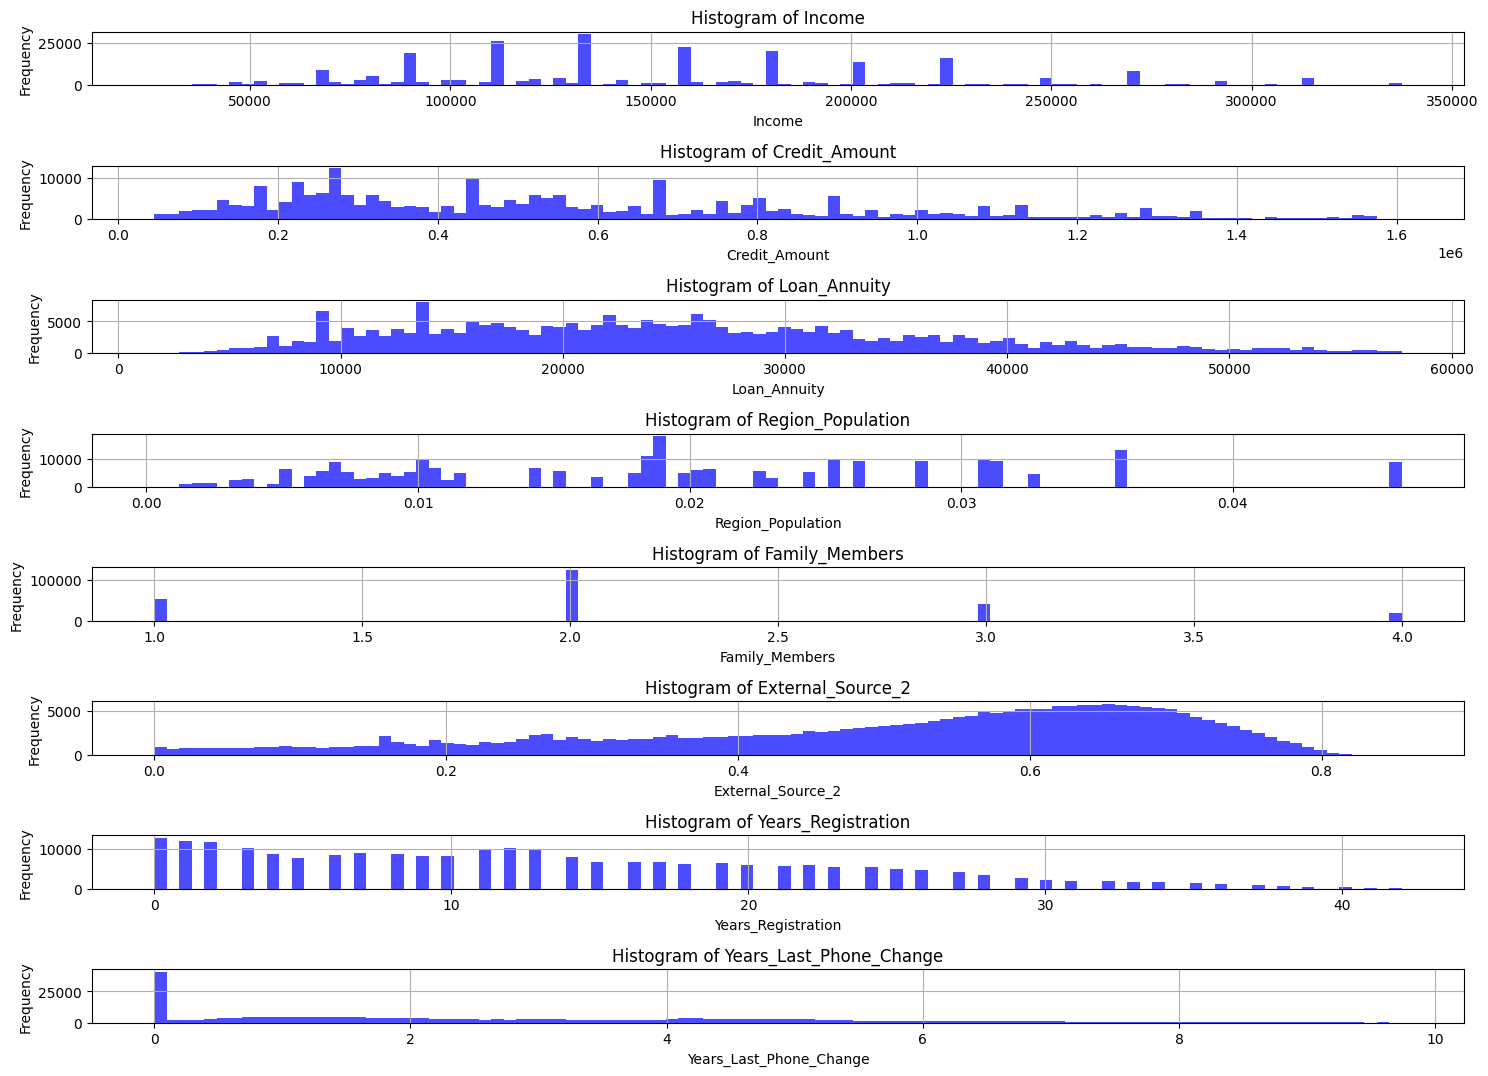

In [269]:
# Vẽ histogram cho tất cả các cột số
plt.figure(figsize=(15, 60))

for i, column in enumerate(non_numeric_columns.columns):
    plt.subplot(len(df.columns), 1, i + 1)  # Tạo subplot cho từng cột
    df[column].hist(bins=100, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Điều chỉnh bố cục cho phù hợp
plt.show()

In [ ]:
df['Income'] = pd.cut(df['Income'], bins=18000, labels=[i for i in range(18000)])
df['Credit_Amount'] = pd.cut(df['Credit_Amount'], bins=18000, labels=[i for i in range(18000)])
df['Loan_Annuity'] = pd.cut(df['Loan_Annuity'], bins=18000, labels=[i for i in range(18000)])
df['Region_Population'] = pd.cut(df['Region_Population'], bins=18000, labels=[i for i in range(18000)])
df['External_Source_2'] = pd.cut(df['External_Source_2'], bins=18000, labels=[i for i in range(18000)])
df['Years_Registration'] = pd.cut(df['Years_Registration'], bins=18000, labels=[i for i in range(18000)])
df['Years_Last_Phone_Change'] = pd.cut(df['Years_Last_Phone_Change'], bins=18000, labels=[i for i in range(18000)])
df['Family_Members'] = df['Family_Members'].astype('int64')

# Chuyển đổi các cột đã binned thành giá trị số (label encoding)
for column in ['Income', 'Credit_Amount', 'Loan_Annuity', 'Region_Population', 'External_Source_2', 'Years_Registration', 'Years_Last_Phone_Change']:
    df[column] = df[column].cat.codes  # Chuyển đổi giá trị thành mã số


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240427 entries, 0 to 270279
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Client_ID                          240427 non-null  int64  
 1   Loan_Default                       240427 non-null  int64  
 2   Contract_Type                      240427 non-null  int64  
 3   Gender                             240427 non-null  int64  
 4   Owns_Car                           240427 non-null  int64  
 5   Owns_Realty                        240427 non-null  int64  
 6   Income                             240427 non-null  float64
 7   Credit_Amount                      240427 non-null  float64
 8   Loan_Annuity                       240427 non-null  float64
 9   Type_of_Suite                      240427 non-null  int64  
 10  Income_Type                        240427 non-null  int64  
 11  Education_Type                     240427 no

In [272]:
df.drop(columns = ['Client_ID'])

,Loan_Default,Contract_Type,Gender,Owns_Car,Owns_Realty,Income,Credit_Amount,Loan_Annuity,Type_of_Suite,Income_Type,...,Years_Employed,Years_Registration,Years_Last_Phone_Change,Age_Binned,Years_Employed_Binned,Years_Registration_Binned,Observed_30d_Social_Circle_Binned,Observed_60d_Social_Circle_Binned,Defied_30d_Social_Circle_Binned,Defied_60d_Social_Circle_Binned
0,1,0,1,0,1,202500.0,406597.5,24700.5,6,7,...,1,9.0,3.106849,0,1,3,0,0,0,0
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,...,3,3.0,2.268493,2,1,1,0,0,0,0
2,0,1,1,1,1,67500.0,135000.0,6750.0,6,7,...,0,11.0,2.232877,3,1,3,0,0,0,0
3,0,0,1,0,1,121500.0,513000.0,21865.5,6,7,...,8,11.0,3.030137,3,3,3,0,0,0,0
4,0,0,1,0,1,99000.0,490495.5,27517.5,5,4,...,4,13.0,6.947945,2,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270275,0,0,0,0,1,112500.0,345510.0,17770.5,6,1,...,1,1.0,6.342466,1,1,1,2,2,0,0
270276,0,0,0,0,1,112500.0,225000.0,22050.0,6,3,...,25,20.0,0.000000,4,0,0,0,0,0,0
270277,0,0,0,0,1,153000.0,677664.0,29979.0,6,7,...,21,18.0,5.230137,2,0,2,2,2,0,0
270278,1,0,0,0,1,171000.0,370107.0,20205.0,6,1,...,13,7.0,0.882192,1,2,3,0,0,0,0


In [273]:
# Giả sử df là DataFrame của bạn
# Lấy cột mục tiêu và đặc trưng
# data_test = df.sample(1000)

X = df.drop(columns=['Loan_Default'])  # Các cột đặc trưng
y = df['Loan_Default']  # Cột mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Độ chính xác của mô hình: {accuracy:.2f}")
print("Báo cáo phân loại:\n", report)

# Lưu mô hình vào file
joblib.dump(model, 'naive_bayes_model.joblib')

Độ chính xác của mô hình: 0.90
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43517
           1       0.00      0.00      0.00      4569

    accuracy                           0.90     48086
   macro avg       0.45      0.50      0.48     48086
weighted avg       0.82      0.90      0.86     48086



c:\Users\ADMIN\Documents\school\prj_dang\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\Documents\school\prj_dang\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\Documents\school\prj_dang\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

['naive_bayes_model.joblib']

In [274]:
pd.DataFrame(y_pred).value_counts()

0
0    48086
Name: count, dtype: int64